In [2]:
import pandas as pd

df = pd.read_csv('dataset.csv')
df.head()

,text,label
0,I don't know who left other than him.,0
1,I also was very depressed and cryed very very ...,1
2,I am a 6 yr survivor and have been out of trea...,0
3,I have enough energy for 16 hour periods.,0
4,I was diagnosed in October 2009 at age 53.,0


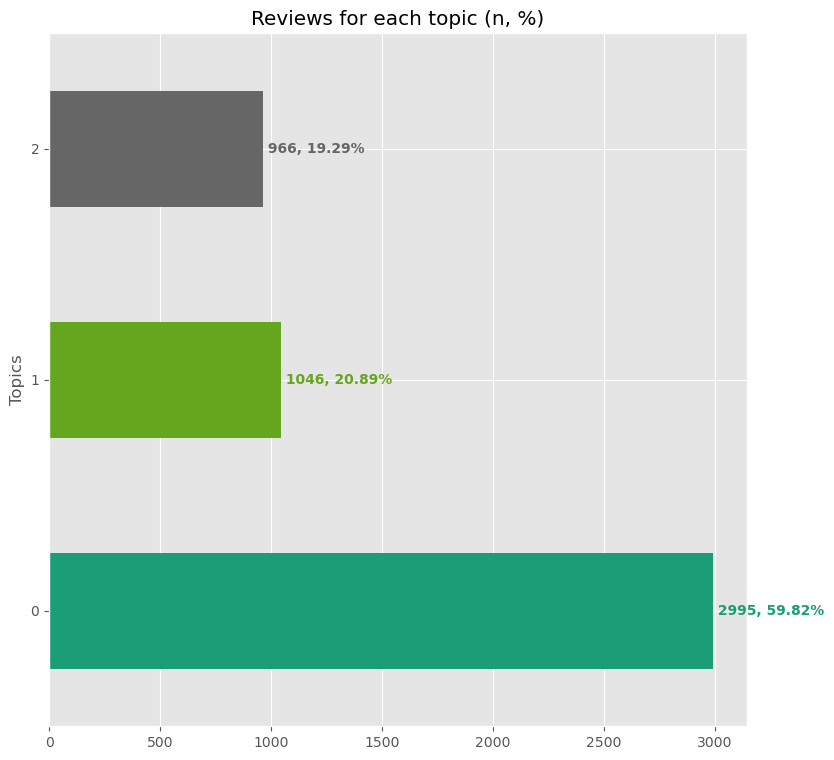

In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')


num_classes = len(df["label"].value_counts())

colors = plt.cm.Dark2(np.linspace(0, 1, num_classes))
iter_color = iter(colors)

df["label"].value_counts().plot.barh(title="Reviews for each topic (n, %)", 
                                                 ylabel="Topics",
                                                 color=colors,
                                                 figsize=(9,9))

for i, v in enumerate(df["label"].value_counts()):
  c = next(iter_color)
  plt.text(v, i,
           " "+str(v)+", "+str(round(v*100/df.shape[0],2))+"%", 
           color=c, 
           va='center', 
           fontweight='bold')

In [5]:
# for Colab users: !pip install translate
from translate import Translator
from termcolor import colored


translator= Translator(from_lang="it", to_lang="en")

def print_rand_example(df, col_name, col_value, chars=180):
    '''print a random review and its translation given a label
  Args:
    - df: input dataframe
    - col_name: column to use as filter (e.g. Label)
    - col_value: value of col_name to use as filter 
    - chars (optional, def:180) max number of characters to display
  '''
    original = df[df[col_name]==col_value].sample()["text"].values[0]
    translation = translator.translate(original).replace("&#39;","'")
    print(colored("\nOriginal", 'green', attrs=['bold','underline']))
    print(original[0:chars] + "...")
    print(colored("\nTranslation", 'red', attrs=['bold','underline']))
    print(translation[0:chars] + "...")

In [6]:
print_rand_example(df, "label", 1)


Original
This morning I could hardly get out of bed....

Translation
This morning I could hardly get out of bed....


In [8]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

y = tf.keras.utils.to_categorical(df["label"].values, num_classes=num_classes)

x_train, x_test, y_train, y_test = train_test_split(df['text'], y, test_size=0.20)

In [12]:
# for Colab users: !pip install tensorflow_text
import tensorflow_hub as hub
import tensorflow_text as text

preprocessor = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder-cmlm/multilingual-preprocess/2")
encoder = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder-cmlm/multilingual-base/1")


def get_embeddings(sentences):
    '''return BERT-like embeddings of input text
  Args:
    - sentences: list of strings
  Output:
    - BERT-like embeddings: tf.Tensor of shape=(len(sentences), 768)
  '''
    preprocessed_text = preprocessor(sentences)
    return encoder(preprocessed_text)['pooled_output']


get_embeddings([
    "I don't know who left other than him."]
)

NotFoundError: dlopen(/Users/arnav/miniconda3/envs/diss/lib/python3.10/site-packages/tensorflow_text/python/metrics/_text_similarity_metric_ops.so, 0x0006): tried: '/Users/arnav/miniconda3/envs/diss/lib/python3.10/site-packages/tensorflow_text/python/metrics/_text_similarity_metric_ops.so' (no such file)

In [13]:
print(tf.__version__)

2.8.0
